In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


(np.float64(-0.5), np.float64(1599.5), np.float64(1199.5), np.float64(-0.5))

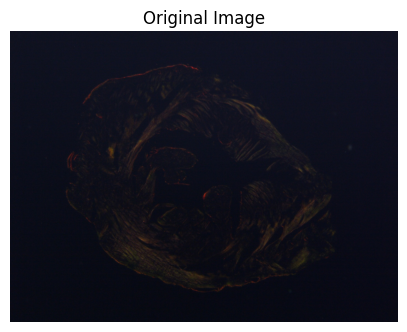

In [6]:
# Read image
img = cv2.imread('Task3.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display original image
plt.figure(figsize=(5,5))
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis('off')

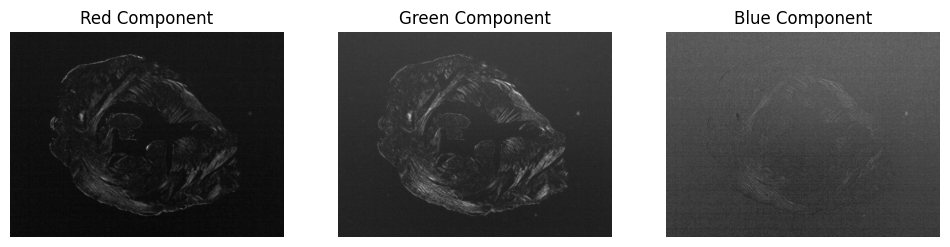

In [7]:
#split and display rgb

# Split RGB channels
R, G, B = cv2.split(img_rgb)

# Display channels
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(R, cmap='gray')
plt.title("Red Component")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(G, cmap='gray')
plt.title("Green Component")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(B, cmap='gray')
plt.title("Blue Component")
plt.axis('off')

plt.show()


In [8]:
R_eq = cv2.equalizeHist(R)
G_eq = cv2.equalizeHist(G)
B_eq = cv2.equalizeHist(B)


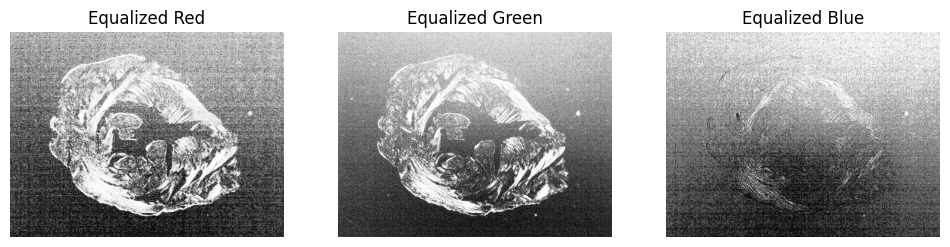

In [9]:
# display equalized components
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(R_eq, cmap='gray')
plt.title("Equalized Red")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(G_eq, cmap='gray')
plt.title("Equalized Green")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(B_eq, cmap='gray')
plt.title("Equalized Blue")
plt.axis('off')

plt.show()

(np.float64(-0.5), np.float64(1599.5), np.float64(1199.5), np.float64(-0.5))

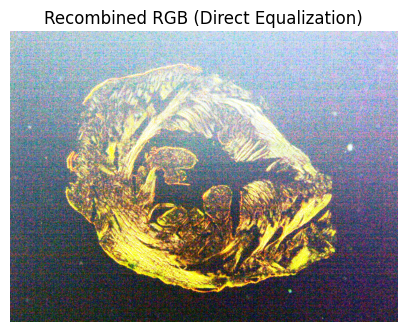

In [10]:
#  Recombine Equalized RGB Channels
img_rgb_eq = cv2.merge((R_eq, G_eq, B_eq))

plt.figure(figsize=(5,5))
plt.imshow(img_rgb_eq)
plt.title("Recombined RGB (Direct Equalization)")
plt.axis('off')

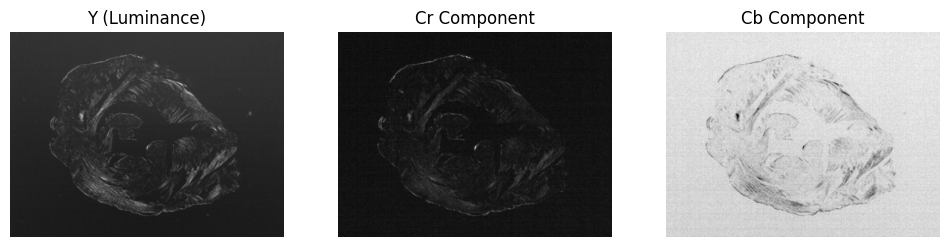

In [11]:
# Correct Method – Histogram Equalization Using Y Channel

# Recommended method for color images

# Convert RGB to YCrCb
ycrcb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
Y, Cr, Cb = cv2.split(ycrcb)

# Display Y, Cr, Cb components
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(Y, cmap='gray')
plt.title("Y (Luminance)")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(Cr, cmap='gray')
plt.title("Cr Component")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(Cb, cmap='gray')
plt.title("Cb Component")
plt.axis('off')

plt.show()

In [12]:
# Histogram Equalization on Luminance Channel
Y_eq = cv2.equalizeHist(Y)

(np.float64(-0.5), np.float64(1599.5), np.float64(1199.5), np.float64(-0.5))

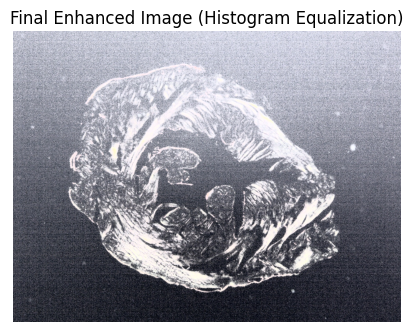

In [13]:
# Recombine and Display Final Enhanced Image
# Merge channels back
ycrcb_eq = cv2.merge((Y_eq, Cr, Cb))

# Convert back to RGB
img_final = cv2.cvtColor(ycrcb_eq, cv2.COLOR_YCrCb2RGB)

plt.figure(figsize=(5,5))
plt.imshow(img_final)
plt.title("Final Enhanced Image (Histogram Equalization)")
plt.axis('off')

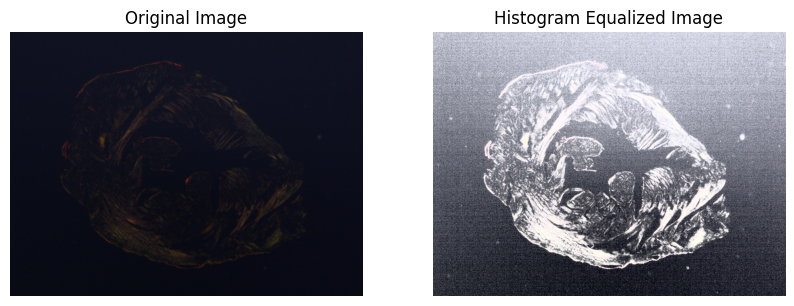

In [14]:
# Comparison – Original vs Enhanced
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(img_final)
plt.title("Histogram Equalized Image")
plt.axis('off')

plt.show()

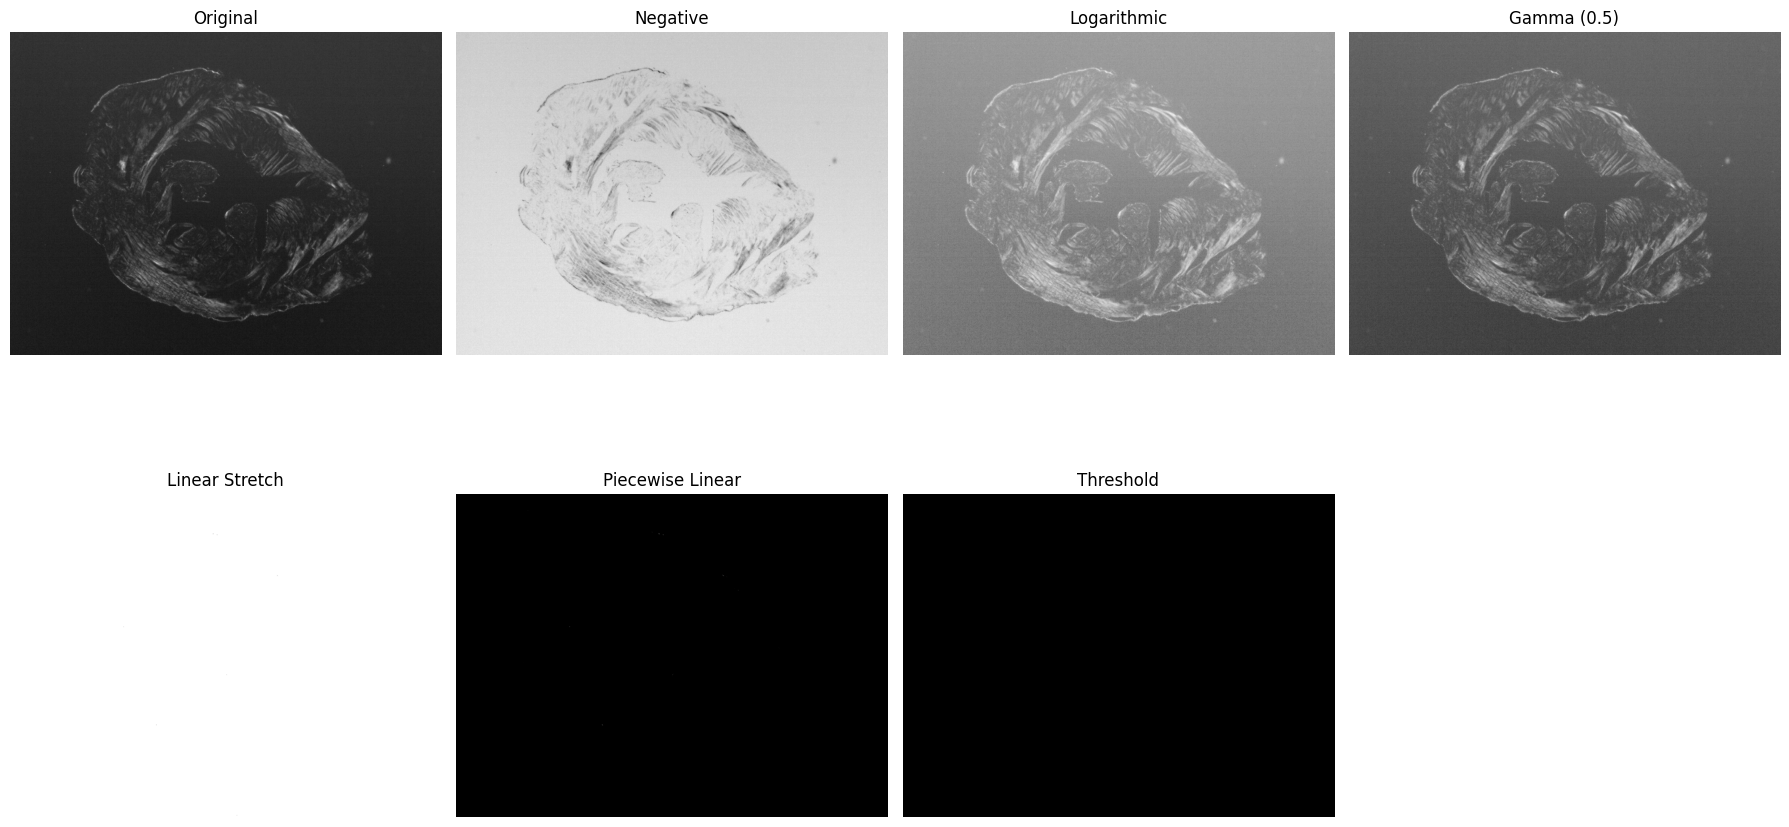

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# ---------- Transformation functions ----------

def negative_transform(img):
    return 255 - img

def log_transform(img, c=1):
    img_float = img.astype(np.float32)
    return np.uint8(c * np.log(1 + img_float) / np.log(1 + np.max(img_float)) * 255)

def gamma_transform(img, gamma=1.0):
    img_float = img.astype(np.float32) / 255.0
    return np.uint8(np.power(img_float, gamma) * 255)

def linear_contrast_stretch(img):
    r_min = np.min(img)
    r_max = np.max(img)
    stretched = (img - r_min) * 255 / (r_max - r_min)
    return np.uint8(stretched)

def piecewise_linear(img, r1, s1, r2, s2):
    result = np.zeros_like(img, dtype=np.float32)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            r = img[i,j]
            if r < r1:
                result[i,j] = (s1 / r1) * r
            elif r <= r2:
                result[i,j] = ((s2 - s1) / (r2 - r1)) * (r - r1) + s1
            else:
                result[i,j] = ((255 - s2) / (255 - r2)) * (r - r2) + s2
    return np.uint8(result)

def threshold_transform(img, T):
    return np.uint8((img > T) * 255)

# ---------------------------------------------

# Read image as grayscale
img = cv2.imread('Task3.jpg', cv2.IMREAD_GRAYSCALE)

# Apply transformations
neg_img = negative_transform(img)
log_img = log_transform(img, c=1)
gamma_img = gamma_transform(img, gamma=0.5)   # gamma < 1 brightens image
linear_img = linear_contrast_stretch(img)
piecewise_img = piecewise_linear(img, r1=70, s1=0, r2=140, s2=255)
threshold_img = threshold_transform(img, T=100)

# Plotting all results
titles = ['Original', 'Negative', 'Logarithmic', 'Gamma (0.5)', 'Linear Stretch', 'Piecewise Linear', 'Threshold']
images = [img, neg_img, log_img, gamma_img, linear_img, piecewise_img, threshold_img]

plt.figure(figsize=(18,10))

for i in range(len(images)):
    plt.subplot(2,4,i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()
